In [2]:
import sys
import numpy as np
from scipy import optimize
sys.path.append("../../NMR_FF_tools/relaxation_times/")
import relaxation_times as rt
import manage_files as mf
import plotting as pt
import matplotlib.pyplot as plt
import os
import re
import yaml
import fnmatch
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

/home/nenciric/anaconda3/envs/all3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
GWALP_res=[]
T1_GWALP=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/Gwalp_DSDS_T1_experiment.dat") as f:
    for line in f:
        GWALP_res.append(int(line.split()[0])-1)
        T1_GWALP.append(float(line.split()[1]))

T2_GWALP=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/Gwalp_DSDS_T2_experiment.dat") as f:
    for line in f:
        T2_GWALP.append(float(line.split()[1]))
        
hetNOE_GWALP=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/Gwalp_DSDS_hetnoe_experiment.dat") as f:
    for line in f:
        hetNOE_GWALP.append(float(line.split()[1]))
        
######################################################        
eElab_res=[]
T1_eElab=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/eElaB_DSDS_T1_experiment.dat") as f:
    for line in f:
        eElab_res.append(int(float(line.split()[0]))-1)
        T1_eElab.append(float(line.split()[1]))
        
        
T2_eElab=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/eElaB_DSDS_T2_experiment.dat") as f:
    for line in f:
        T2_eElab.append(float(line.split()[1]))
        
hetNOE_eElab=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/eElaB_DSDS_hetnoe_experiment.dat") as f:
    for line in f:
        hetNOE_eElab.append(float(line.split()[1]))
        
######################################################    
eYqjD_res=[]
T1_eYqjD=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/eYqjD_DSDS_T1_experiment.dat") as f:
    for line in f:
        eYqjD_res.append(int(float(line.split()[0]))-1)
        T1_eYqjD.append(float(line.split()[1]))
        
        
T2_eYqjD=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/eYqjD_DSDS_T2_experiment.dat") as f:
    for line in f:
        T2_eYqjD.append(float(line.split()[1]))
        
hetNOE_eYqjD=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/eYqjD_DSDS_hetnoe_experiment.dat") as f:
    for line in f:
        hetNOE_eYqjD.append(float(line.split()[1]))
        
######################################################    
yFis1_res1=[]
T1_yFis1=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/yFis1_DSDS_T1_experiment.dat") as f:
    for line in f:
        yFis1_res1.append(int(float(line.split()[0]))-1)
        T1_yFis1.append(float(line.split()[1]))
        
yFis1_res2=[]        
T2_yFis1=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/yFis1_DSDS_T2_experiment.dat") as f:
    for line in f:
        yFis1_res2.append(int(float(line.split()[0]))-1)
        T2_yFis1.append(float(line.split()[1]))
        
hetNOE_yFis1=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/yFis1_DSDS_hetnoe_experiment.dat") as f:
    for line in f:
        hetNOE_yFis1.append(float(line.split()[1]))
        
######################################################    
hMff_res=[]
T1_hMff=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/hMff_DSDS_T1_experiment.dat") as f:
    for line in f:
        hMff_res.append(int(float(line.split()[0]))-1)
        T1_hMff.append(float(line.split()[1]))
        
        
T2_hMff=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/hMff_DSDS_T2_experiment.dat") as f:
    for line in f:
        T2_hMff.append(float(line.split()[1]))
        
hetNOE_hMff=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/hMff_DSDS_hetnoe_experiment.dat") as f:
    for line in f:
        hetNOE_hMff.append(float(line.split()[1]))
        
######################################################    
mg2_res=[]
T1_mg2=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/MG2_DSDS_T1_experiment.dat") as f:
    for line in f:
        mg2_res.append(int(float(line.split()[0]))-1)
        T1_mg2.append(float(line.split()[1]))
        
        
T2_mg2=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/MG2_DSDS_T2_experiment.dat") as f:
    for line in f:
        T2_mg2.append(float(line.split()[1]))
        
hetNOE_mg2=[]
with open("../figure_time_scales_protein/experimental_relaxation_data/MG2_DSDS_hetnoe_experiment.dat") as f:
    for line in f:
        hetNOE_mg2.append(float(line.split()[1]))
        
######################################################    

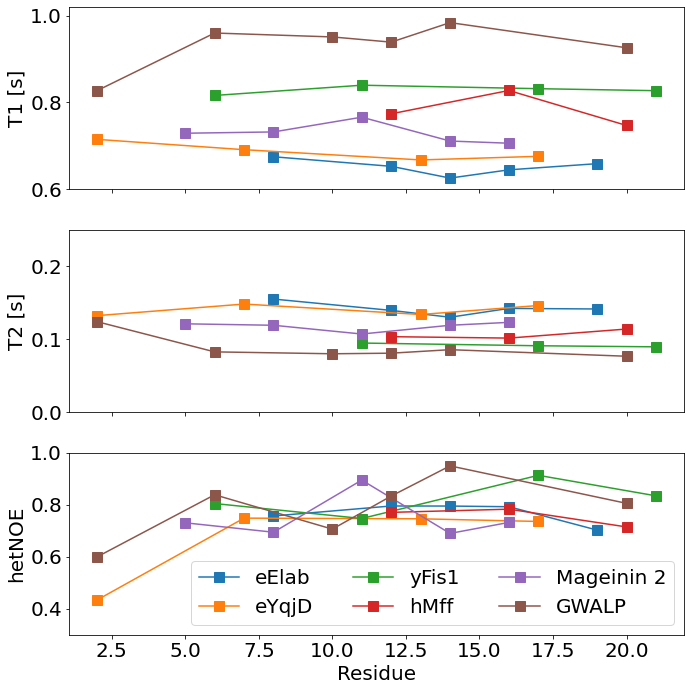

In [59]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 20})

fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True)
    
ax1.set_ylabel("T1 [s]")

ax2.set_ylabel("T2 [s]")

ax3.set_ylabel("hetNOE")
ax3.set_xlabel("Residue")
max_T1=0
max_T2=0
max_noe=0
min_noe=0

ax1.set_ylim(0.5,1.2)
ax2.set_ylim(0.0,0.45)
ax3.set_ylim(-0.1,1.1)

ax1.set_ylim(0.6,1.02)
ax2.set_ylim(0.0,0.25)
ax3.set_ylim(0.3,1)
    
#ax1.set_yticks((0.9,1),fontname = "Times")

#ax1.set_xticks([])
ax1.plot(eElab_res,T1_eElab,"s-",color="C0",markersize=10)
ax2.plot(eElab_res,T2_eElab,"s-",color="C0",markersize=10)
ax3.plot(eElab_res,hetNOE_eElab,"s-",color="C0",markersize=10,label="eElab")

ax1.plot(eYqjD_res,T1_eYqjD,"s-",color="C1",markersize=10)
ax2.plot(eYqjD_res,T2_eYqjD,"s-",color="C1",markersize=10)
ax3.plot(eYqjD_res,hetNOE_eYqjD,"s-",color="C1",markersize=10,label="eYqjD")

ax1.plot(yFis1_res1,T1_yFis1,"s-",color="C2",markersize=10)
ax2.plot(yFis1_res2,T2_yFis1,"s-",color="C2",markersize=10)
ax3.plot(yFis1_res,hetNOE_yFis1,"s-",color="C2",markersize=10,label="yFis1")

ax1.plot(hMff_res,T1_hMff,"s-",color="C3",markersize=10)
ax2.plot(hMff_res,T2_hMff,"s-",color="C3",markersize=10)
ax3.plot(hMff_res,hetNOE_hMff,"s-",color="C3",markersize=10,label="hMff") 

ax1.plot(mg2_res,T1_mg2,"s-",color="C4",markersize=10)
ax2.plot(mg2_res,T2_mg2,"s-",color="C4",markersize=10)
ax3.plot(mg2_res,hetNOE_mg2,"s-",color="C4",markersize=10,label="Mageinin 2") 
    
ax1.plot(GWALP_res,T1_GWALP,"s-",color="C5",markersize=10)
ax2.plot(GWALP_res,T2_GWALP,"s-",color="C5",markersize=10)
ax3.plot(GWALP_res,hetNOE_GWALP,"s-",color="C5",markersize=10,label="GWALP")

ax3.legend(ncol=3)

plt.savefig("experiment2.pdf")